In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
%matplotlib inline

In [297]:
df=pd.read_csv('vgsales.csv')

In [298]:
# df.head()

In [299]:
# df.describe()

In [300]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [301]:
years=list(range(1980,2021))
years=[str(year) for year in years]
# years

In [302]:
df[df.Name.str.contains('|'.join(years)) & df.Year.isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1649,1651,NASCAR Thunder 2003,PS2,NaN,Racing,Unknown,0.60,0.46,0.00,0.16,1.22
2586,2588,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,Konami Digital Entertainment,0.04,0.33,0.26,0.17,0.80
3501,3503,Madden NFL 2002,XB,NaN,Sports,Unknown,0.53,0.02,0.00,0.03,0.58
4797,4799,NFL GameDay 2003,PS2,NaN,Sports,Unknown,0.20,0.15,0.00,0.05,0.40
5162,5164,NBA Live 2003,XB,NaN,Sports,Electronic Arts,0.31,0.04,0.00,0.01,0.36
5240,5242,Tomb Raider (2013),PC,NaN,Action,Square Enix,0.06,0.25,0.00,0.05,0.36
5669,5671,All-Star Baseball 2005,PS2,NaN,Sports,Unknown,0.16,0.12,0.00,0.04,0.32


In [303]:
def check_if_year_exists(string):
    for year in years:
        if year in string:
            return year
        if 'Wii' in string:
            return 'Wii'
    return None

In [304]:
df.loc[df.Name.str.contains('|'.join(years)) & df.Year.isna(),'Year']=df.Name.apply(check_if_year_exists)

In [305]:
df['Year'].fillna(df.Year.mode().values[0],inplace=True)

In [306]:
df['Publisher'].fillna('Unknown',inplace=True)

In [307]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [308]:
df=df.drop(['Name','Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)

In [309]:
df.columns

Index(['Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales'], dtype='object')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

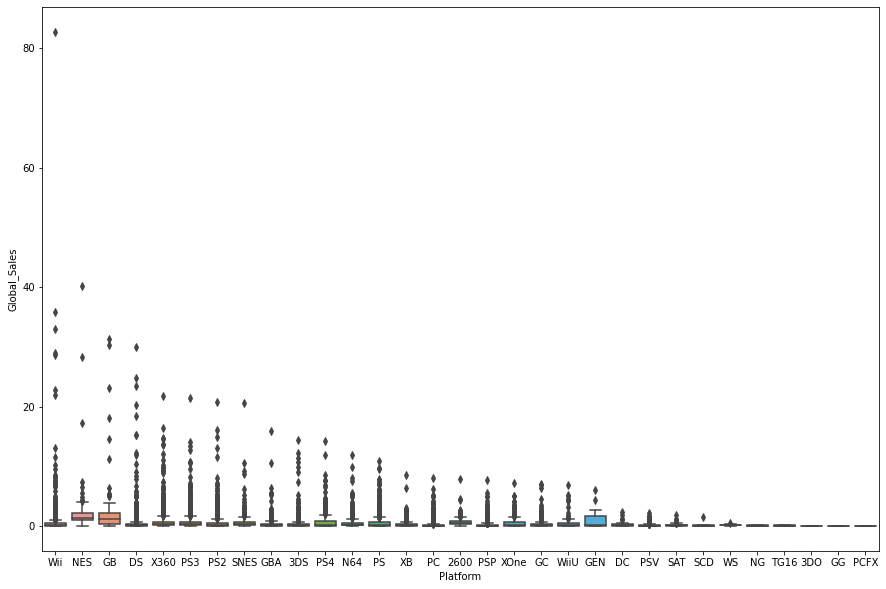

In [310]:
plt.figure(figsize=[15,10])
sns.boxplot('Platform','Global_Sales',data=df)

In [311]:
df['SalesInterval']=pd.cut(df.Global_Sales,bins=20)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Global_Sales'>

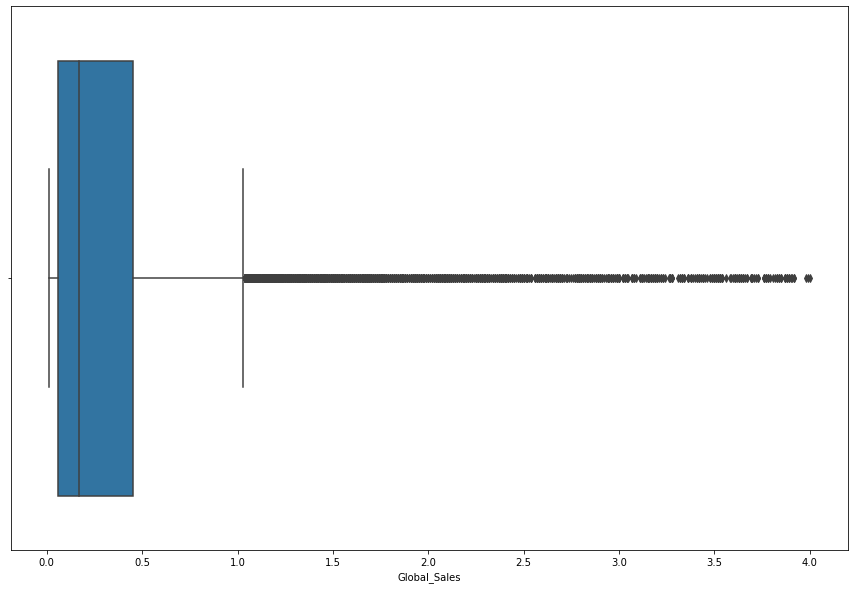

In [312]:
plt.figure(figsize=[15,10])
# sns.barplot(df['SalesInterval'].value_counts().index,df['SalesInterval'].value_counts().values,orient='v')
sns.boxplot(df[df.Global_Sales<=4].Global_Sales)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Global_Sales'>

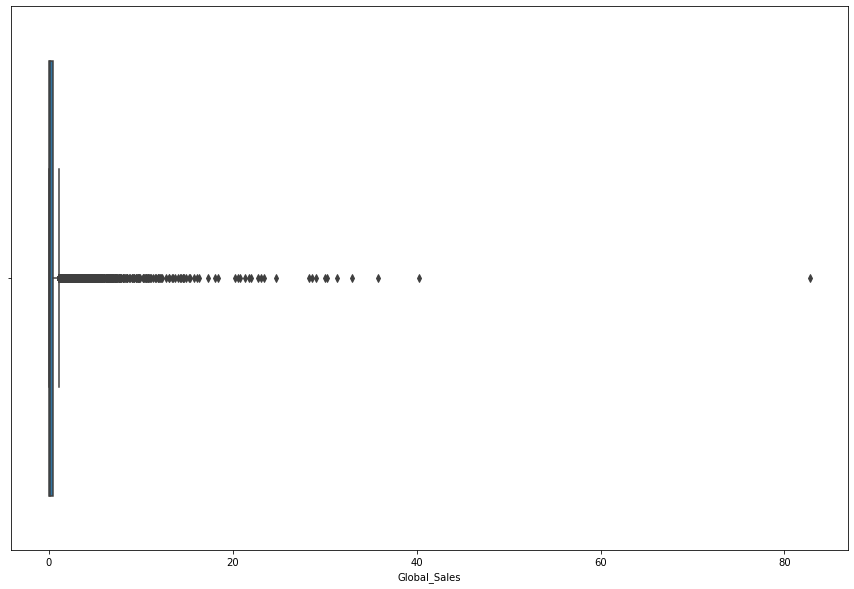

In [313]:
plt.figure(figsize=[15,10])
sns.boxplot(df.Global_Sales)

In [314]:
# Drop Outliers 
df=df[df.Global_Sales<=8].drop(['SalesInterval'],axis=1)

In [315]:
# Encode

In [316]:
df.head()

,Platform,Year,Genre,Publisher,Global_Sales
87,PS,1999.0,Role-Playing,SquareSoft,7.86
88,DS,2008.0,Role-Playing,Nintendo,7.84
89,2600,1982.0,Puzzle,Atari,7.81
90,PSP,2005.0,Action,Take-Two Interactive,7.72
91,Wii,2010.0,Platform,Nintendo,7.69


In [317]:
for column in ['Platform','Genre','Publisher']:
    dummies=pd.get_dummies(df[column])
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)

In [318]:
X,y=df.drop(['Global_Sales'],axis=1),df['Global_Sales']

In [323]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [320]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled,y,test_size=0.2)

In [324]:
rf=RandomForestRegressor()
lr=LinearRegression()

In [325]:
lr.fit(X_scaled_train,y_train)

LinearRegression()

In [326]:
lr.score(X_scaled_test,y_scaled_test)

-5.508366634708918e+28

In [329]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [330]:
rf.score(X_test,y_test)

0.004734302850420646

In [335]:
result=pd.DataFrame({'y_pred':rf.predict(X_test),'y_true':y_test})

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y_pred', ylabel='y_true'>

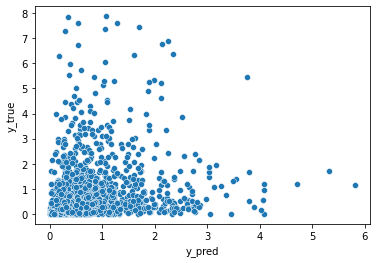

In [336]:
sns.scatterplot(result['y_pred'],result['y_true'])